In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
from copy import deepcopy
import seaborn as sns

%matplotlib inline

In [2]:
from __future__ import print_function, division
import requests

In [3]:
mv = pd.read_csv("/Users/Chuoran/DataScience/Metis/My Challenge/challenges_data/2013_movies.csv")

In [4]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [5]:
mvfilled = deepcopy(mv)
mvfilled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [6]:
print(mv['Budget'].mean())
mvfilled['Budget'] = mvfilled['Budget'].fillna(mv['Budget'].mean(), inplace=True)

74747191.01123595


In [7]:
mvfilled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                0 non-null object
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: int64(2), object(5)
memory usage: 5.5+ KB


In [8]:
mvfilled.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,None,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,None,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,None,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,None,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,None,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


**Challenge 1**

Plot domestic total gross over time.

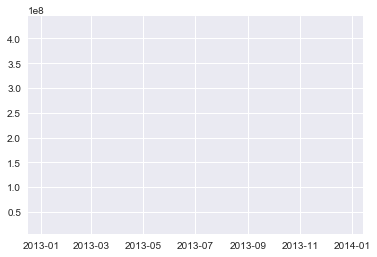

In [9]:
mv.ReleaseDate = pd.to_datetime(mv.ReleaseDate)
plt.plot(mv.ReleaseDate, mv.DomesticTotalGross, 'bx')

**Challenge 2**

Plot runtime vs. domestic total gross.



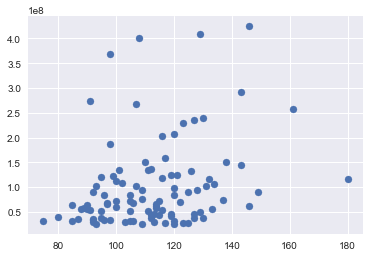

In [10]:
plt.scatter(mv.Runtime, mv.DomesticTotalGross)


**Challenge 3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [11]:
mv.groupby(['Rating'])[['Runtime','DomesticTotalGross']].mean()

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


**Challenge 4**

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.


In [12]:
N = len(mv.Rating.unique())


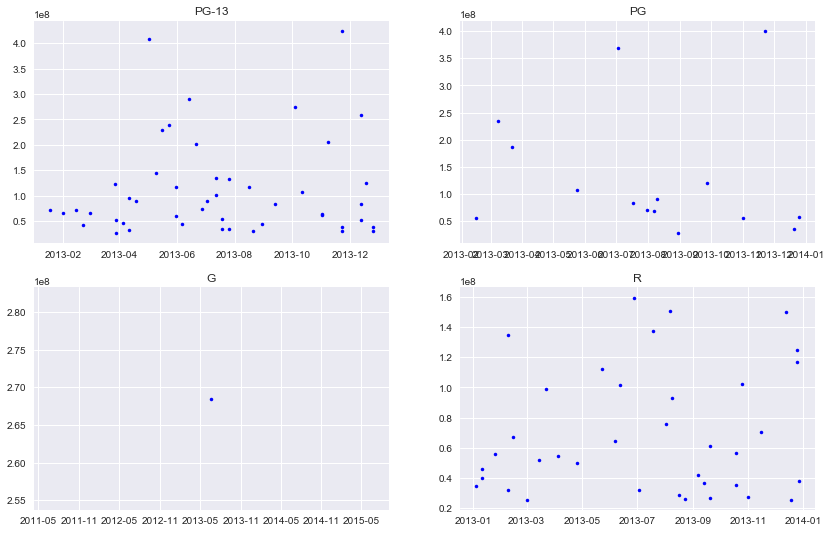

In [13]:
plt.figure(figsize=(14, 9))

for n in range(1,N+1):
    plt.subplot(N/2,2,n)
    X = mv[mv.Rating == mv.Rating.unique()[n-1]].ReleaseDate 
    y = mv[mv.Rating == mv.Rating.unique()[n-1]].DomesticTotalGross
    plt.plot(X,y,'b.')
    plt.title(mv.Rating.unique()[n-1])

**Challenge 5**

What director in your dataset has the highest gross per movie?

In [14]:
mv.groupby(['Director'])['DomesticTotalGross'].mean().reset_index().sort_values('DomesticTotalGross').head(10)

,Director,DomesticTotalGross
83,Spike Jonze,25568251
45,Jon LucasScott Moore,25682380
24,Edgar Wright,26004851
4,Andrew Niccol,26627201
77,Ron Howard,26947624
36,Jean-Marc Vallee,27298285
38,Jeff Wadlow,28795985
64,Morgan Spurlock,28873374
70,Peter Segal,29807260
50,Ken Scott,30664106


**Challenge 6**

Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013

Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."

In [17]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.5+ KB


In [29]:
mv['release_m'] = mv['ReleaseDate'].apply(lambda x: x.month)

In [30]:
mv.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,release_m
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,11
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,5
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,11
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,7
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,6


In [79]:
import scipy

forBar = mv.groupby('release_m')['DomesticTotalGross'].agg(['mean',scipy.stats.sem,'count',np.std]).reset_index()

In [80]:
forBar

,release_m,mean,sem,count,std
0,1,4.954324e+07,6.555914e+06,5,1.465947e+07
1,2,6.738601e+07,1.240927e+07,7,3.283185e+07
2,3,9.609710e+07,2.441314e+07,9,7.323942e+07
3,4,6.094072e+07,1.032911e+07,6,2.530104e+07
4,5,1.774097e+08,3.951859e+07,8,1.117754e+08
5,6,1.506500e+08,3.365826e+07,8,9.519994e+07
6,7,1.057807e+08,2.638732e+07,12,9.140837e+07
7,8,6.853126e+07,1.245915e+07,11,4.132232e+07
8,9,6.171231e+07,1.421654e+07,6,3.482327e+07
9,10,1.150270e+08,4.201272e+07,5,9.394330e+07


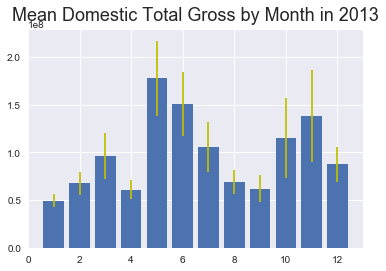

In [78]:
plt.bar(forBar['release_m'],forBar['mean'])
plt.errorbar(forBar['release_m'],forBar['mean'],yerr=forBar['sem'], fmt='none',ecolor = 'y')
plt.title('Mean Domestic Total Gross by Month in 2013', 
          fontdict = {'fontsize': 18,'fontweight' : 10,'verticalalignment': 'bottom'})


Standard Error of Mean(SEM) is calculated by dividing the standard diviation of the sample with the square root of the sample size.
SEM is an indicator of how close the sample mean is to the actual population mean, and it will get smaller when the sample size is bigger or the sample is more centered. For months that have more data,